### EarthquakeAnalysis

#### 1.Get data


In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os


In [2]:
# Catch the request from url and necessary parameters
# request url
# url = 'http://www.ceic.ac.cn/ajax/speedsearch?num=6&&page=1' # page=1
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

# send request
def send_request(url):
    # deleting()
    response = requests.get(url, headers=headers).content.decode()[1: -1]
    # transfer string to dict 
    return json.loads(response)


# parse data 
def analysis_data(data):
    # type conversion
    for i in data['shuju']:
        data_dataframe = pd.DataFrame(i, index=[i['LOCATION_C']])
        # using yield response reducing memory space
        yield data_dataframe
        
        
# save data
def save_data(datas):
    for data in datas:
        if 'Earthquake1.csv' not in os.listdir(os.getcwd()):
            data.to_csv('Earthquake1.csv', mode='a')
        else:
            data.to_csv('Earthquake1.csv', mode='a', header=False)
            
            
# 5 get 60 pages data
def get_url_list():
    url_list = []
    for i in range(1, 59):
        url = 'http://www.ceic.ac.cn/ajax/speedsearch?num=6&&page=%s' % i
        url_list.append(url)
    return url_list
    

In [3]:
# dispatching function
def run():
    # generate urllist
    url_list = get_url_list()
    # send request
    for url in url_list:
        datas = send_request(url)
        # parse data 
        data_dataframe = analysis_data(datas)
        # 4 save data
        save_data(data_dataframe)

In [4]:
run()

#### 2 Present data

<AxesSubplot:title={'center':'Tope10'}, xlabel='LOCATION_C'>

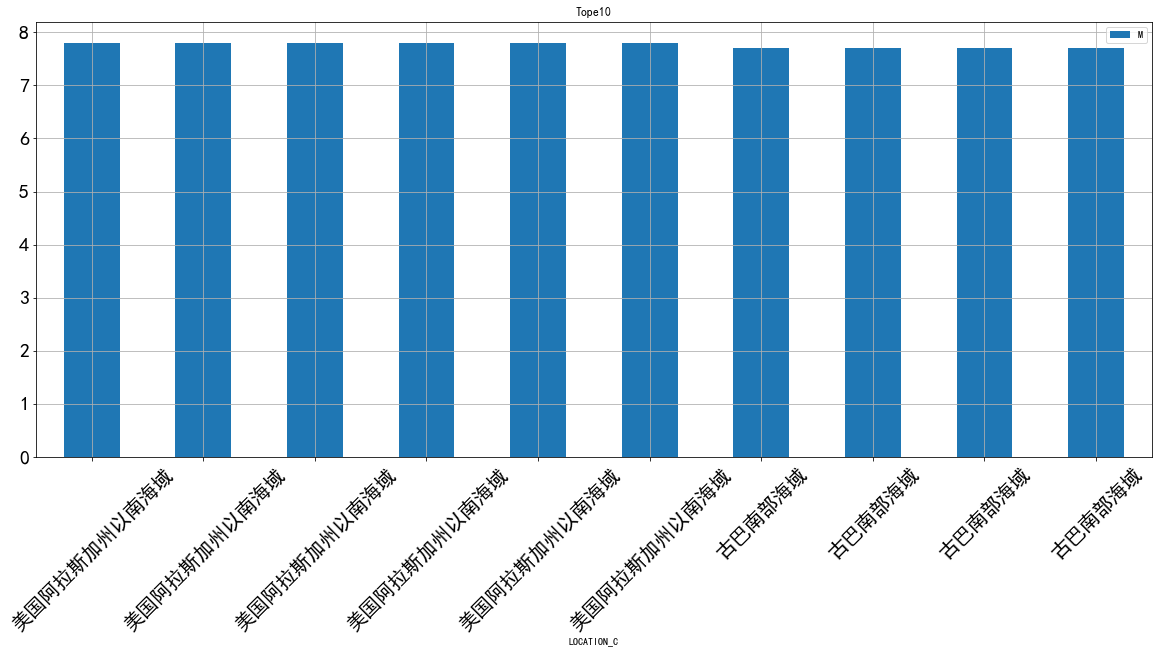

In [5]:
# nees: present top10 earthquake areas within one year, M -> earthquake magnitude  LOCATION_C -> location

# show charcters
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# perpare data   define index usecols
m_data = pd.read_csv('Earthquake1.csv', usecols=['M', 'LOCATION_C'])
# sort top 10 decreasing
top10_data = m_data.sort_values(by='M', ascending=False).head(10)

# plot
# top10_data.plot(kind='bar')
top10_data.index = top10_data['LOCATION_C']
top10_data.plot(kind='bar', title='Tope10', rot=45, grid='-', figsize=(20, 8), fontsize=20)


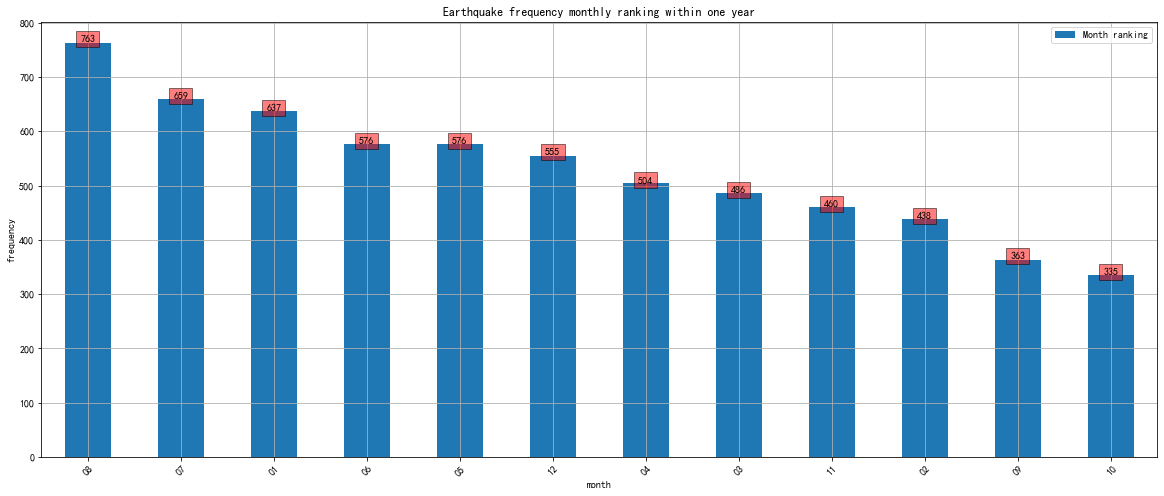

In [6]:
# earthquake frequency per month ranking within one year
# perpare data   O_TIME：occurrence time 
time_data = pd.read_csv('Earthquake1.csv', usecols=['O_TIME'])

# obtain data per month, use map function split
time_data['O_TIME'] = time_data['O_TIME'].map(lambda x: x.split('-')[1])

# classification：classify accroding to the data each month
group_month = time_data.groupby('O_TIME')

# collecting each month data 
group_month_count = group_month.O_TIME.count() # count


# sort and plot
top_month = group_month_count.sort_values(ascending=False) 
top_month.plot(kind='bar', figsize=(20, 8), label='Month ranking')

# additional plot
plt.legend() 
plt.grid() 
plt.title('Earthquake frequency monthly ranking within one year')
plt.xlabel('month')
plt.ylabel('frequency')
plt.xticks(rotation=45)
# enumerate return list subscript and corresponding value
for index, value in enumerate(list(top_month.values)):
    plt.text(index,value+1, '%s' % round(value, 1), ha='center', bbox=dict(facecolor='red', alpha=0.5))